In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_data():
    df = pd.read_csv('..\src\data\DSL-StrongPasswordData.csv')

    H_columns  = [col for col in df.columns if col.startswith('H')]
    DD_columns = [col for col in df.columns if col.startswith('DD')]
    UD_columns = [col for col in df.columns if col.startswith('UD')]

    data = {'total': df.drop(columns=['subject', 'sessionIndex', 'rep']), 'H': df[H_columns], 'DD': df[DD_columns],
            'UD': df[UD_columns]}

    return data, df['subject'].values

In [3]:
dataframe = pd.read_csv('..\src\data\DSL-StrongPasswordData.csv')
dataframe['subject']=dataframe['subject'].astype('category').cat.codes+1
subjects = dataframe["subject"]
df=dataframe.copy()
df.drop(columns=['subject', 'sessionIndex','rep'],axis=1,inplace=True)
df.head()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, subjects, test_size = 0.25, random_state = 0)

In [28]:
mean_training=[]
mad_training=[]
testing = pd.DataFrame()
for subject in tqdm(subjects.unique()):
    genuine_user_data = dataframe.loc[dataframe.subject == subject, \
                                    "H.period":"H.Return"]
    imposter_data = dataframe.loc[dataframe.subject != subject, :]

    train = genuine_user_data[:300]
    mean_vector = train.mean().values
    mad_vector = train.mad().values
    mean_training.append(mean_vector)
    mad_training.append(mad_vector)


    test_genuine = genuine_user_data[300:]
    testing= testing.append(test_genuine)


data_col=['H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return']
mean_training=pd.DataFrame(mean_training,columns=data_col)
mad_training=pd.DataFrame(mad_training,columns=data_col)
testing = testing.sample(n=20,random_state=42)


100%|██████████| 51/51 [00:00<00:00, 59.27it/s]


In [29]:
distance=[]
for i in range(mean_training.shape[0]):
    cur_score=0
    for j in range(mean_training.shape[1]):
        cur_score = cur_score + \
                    abs(X_test.iloc[0].values[j] - \
                    mean_training.iloc[i].values[j]) / mad_training.iloc[i].values[j]
    distance.append(cur_score)

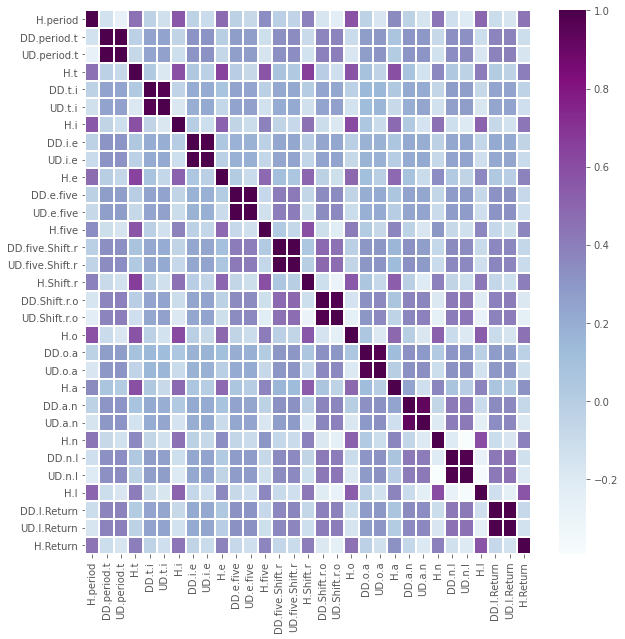

In [23]:
corrMatrix = df[['H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return']].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, linewidths=0.1, cmap="BuPu")
plt.show()

In [30]:
def plot_kmean(df, y_predict, title , model):
  u_labels = np.unique(y_predict)

  plt.figure(figsize=(10,8))
  #plotting the results:
  for i in u_labels:
      plt.scatter(df[y_predict == i , 0] , df[y_predict == i , 1] , label = i, s=30)
  plt.title(title)
  plt.xlim(-1,1.9)
  plt.ylim(-1,1.2)
  plt.show()

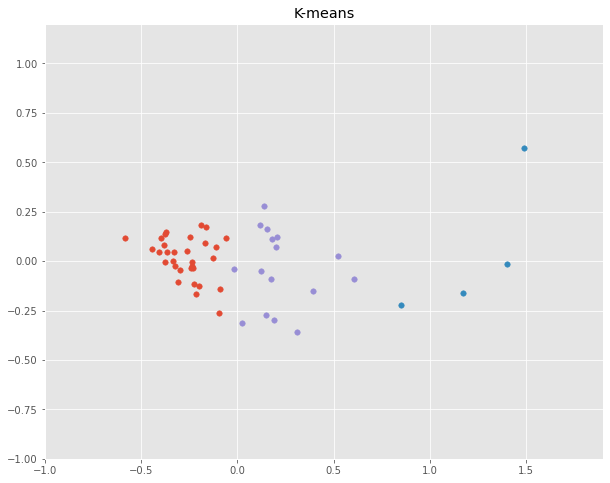

In [31]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=1000, n_init=20)
mean_dataframe = mean_training.copy()
#perform PCA to plot
pca = PCA(2)
#Transform the data
dff = pca.fit_transform(mean_dataframe)
y_pred = kmeans.fit_predict(dff)
mean_dataframe['centroid'] = y_pred

plot_kmean(dff, y_pred, "K-means", kmeans)

In [39]:
def evaluation_model(y_test,y_pred):
    accuracy = metrics.accuracy_score(y_test,y_pred)
    recall= metrics.recall_score(y_test,y_pred,average='weighted')
    precision=metrics.precision_score(y_test,y_pred,average='weighted')
    f1score=metrics.f1_score(y_test,y_pred,average='weighted')

    print(f"Accuracy = {accuracy} \nRecall = {recall} \nPercision = {precision} \nf1_score = {f1score}\n")
    print("Classification report: \n",metrics.classification_report(y_test,y_pred))
    print("Confusion matrix: \n",metrics.confusion_matrix(y_test,y_pred))

In [32]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 5)
random_forest_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = random_forest_classifier.predict(X_test)
y_pred_propa = random_forest_classifier.predict_proba(X_test)
y_pred_propa

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.02 , 0.01 , 0.   , ..., 0.005, 0.005, 0.   ],
       [0.015, 0.01 , 0.005, ..., 0.01 , 0.   , 0.   ],
       ...,
       [0.025, 0.025, 0.02 , ..., 0.   , 0.01 , 0.005],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

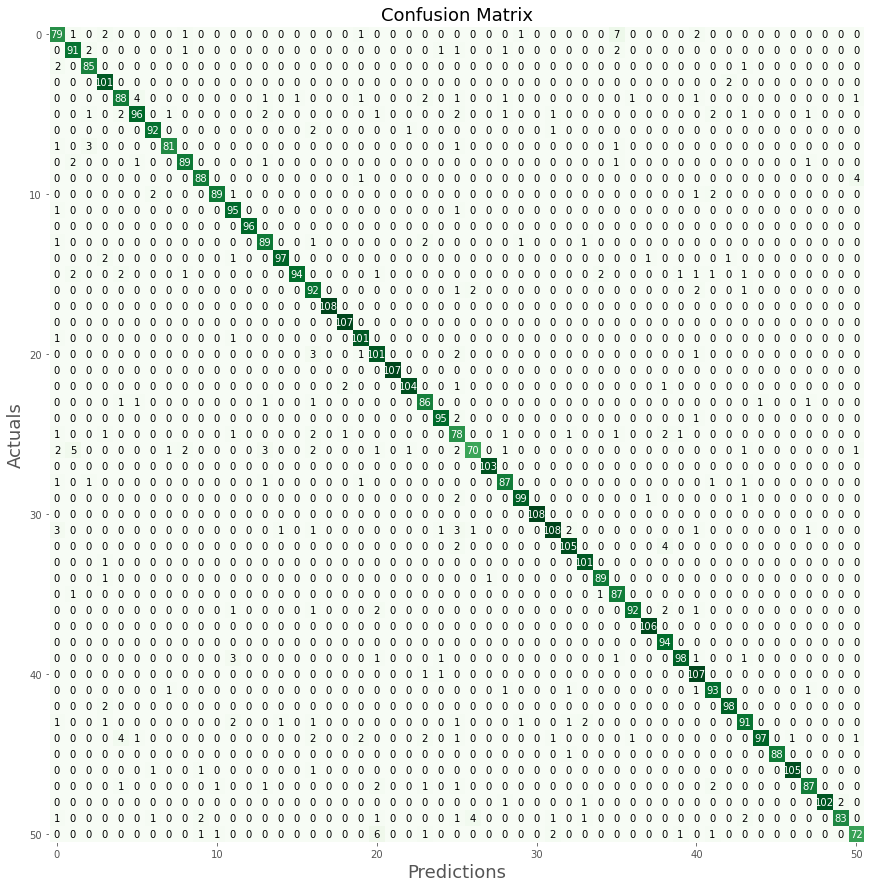

In [33]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(16, 15), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [34]:
threshold = 0.4
for i in range(len(y_pred_propa)):
    model_pred= np.argmax(y_pred_propa[i], axis=0)
    if model_pred >threshold:
        indexes = np.argmax(y_pred_propa, axis=-1)
        maximum_values = y_pred_propa[np.arange(y_pred_propa.shape[0]), indexes]
        print("Genuine")
    else:
        print("Imposter")
    

Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Imposter
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine
Genuine

In [40]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.linear_model import LogisticRegression
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)

In [41]:
n_labels = len(np.unique(y_train))

for i in range(n_labels):
    sub_model = LogisticRegression(penalty=model.penalty, C=model.C)
    sub_model.coef_ = model.coef_[i].reshape(1, -1)
    sub_model.intercept_ = model.intercept_[i].reshape(-1, 1)
    sub_model.classes_ = np.array([0, 1])

    y_train_ovr = np.where(subjects == i, 1, 0)
    score = sub_model.score(df, y_train_ovr)

    print(f"OVR for label={i+1}, score={score:.4f}")

OVR for label=1, score=0.9991
OVR for label=2, score=0.9766
OVR for label=3, score=0.9802
OVR for label=4, score=0.9800
OVR for label=5, score=0.9804
OVR for label=6, score=0.9804
OVR for label=7, score=0.9798
OVR for label=8, score=0.9744
OVR for label=9, score=0.9782
OVR for label=10, score=0.9804
OVR for label=11, score=0.9800
OVR for label=12, score=0.9755
OVR for label=13, score=0.9804
OVR for label=14, score=0.9797
OVR for label=15, score=0.9786
OVR for label=16, score=0.9800
OVR for label=17, score=0.9800
OVR for label=18, score=0.9761
OVR for label=19, score=0.9798
OVR for label=20, score=0.9777
OVR for label=21, score=0.9804
OVR for label=22, score=0.9785
OVR for label=23, score=0.9801
OVR for label=24, score=0.9803
OVR for label=25, score=0.9790
OVR for label=26, score=0.9803
OVR for label=27, score=0.9804
OVR for label=28, score=0.9742
OVR for label=29, score=0.9800
OVR for label=30, score=0.9802
OVR for label=31, score=0.9658
OVR for label=32, score=0.9802
OVR for label=33,

In [42]:
evaluation_model(y_test,y_pred)

Accuracy = 0.7478431372549019 
Recall = 0.7478431372549019 
Percision = 0.7640895110999564 
f1_score = 0.739514128500372

Classification report: 
               precision    recall  f1-score   support

           1       0.59      0.61      0.60        94
           2       0.78      0.74      0.76        99
           3       0.84      0.75      0.79        88
           4       0.84      0.87      0.86       103
           5       0.88      0.58      0.70       102
           6       0.75      0.59      0.66       111
           7       0.59      0.84      0.69        96
           8       0.66      0.82      0.73        87
           9       0.79      0.75      0.77        95
          10       0.72      0.81      0.76        93
          11       0.76      0.63      0.69        95
          12       0.65      0.80      0.72        97
          13       0.67      0.84      0.75        96
          14       0.77      0.91      0.83        95
          15       0.72      0.91      0.8

In [43]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 5)
random_forest_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = random_forest_classifier.predict(X_test)
pred_vs_actual = pd.DataFrame()
pred_vs_actual["act"] = y_test
pred_vs_actual["pred"] = y_pred
pred_vs_actual.head()

,act,pred
9516,24,24
8201,21,21
11343,29,29
2685,7,7
7912,20,20


In [44]:
evaluation_model(y_test,y_pred)

Accuracy = 0.9409803921568628 
Recall = 0.9409803921568628 
Percision = 0.9426381489706587 
f1_score = 0.9409238580192316

Classification report: 
               precision    recall  f1-score   support

           1       0.84      0.84      0.84        94
           2       0.89      0.92      0.91        99
           3       0.92      0.97      0.94        88
           4       0.91      0.98      0.94       103
           5       0.90      0.86      0.88       102
           6       0.93      0.86      0.90       111
           7       0.96      0.96      0.96        96
           8       0.96      0.93      0.95        87
           9       0.95      0.94      0.94        95
          10       0.96      0.95      0.95        93
          11       0.98      0.94      0.96        95
          12       0.90      0.98      0.94        97
          13       1.00      1.00      1.00        96
          14       0.90      0.94      0.92        95
          15       0.98      0.95      0.

In [45]:
# Fitting K-NN Classification to the Training set
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)
pred_vs_actual = pd.DataFrame()
pred_vs_actual["act"] = y_test
pred_vs_actual["pred"] = y_pred
pred_vs_actual.head()

,act,pred
9516,24,24
8201,21,21
11343,29,29
2685,7,7
7912,20,20


In [46]:
evaluation_model(y_test,y_pred)

Accuracy = 0.746078431372549 
Recall = 0.746078431372549 
Percision = 0.7656553215369468 
f1_score = 0.747018579507541

Classification report: 
               precision    recall  f1-score   support

           1       0.37      0.74      0.50        94
           2       0.73      0.77      0.75        99
           3       0.45      0.65      0.53        88
           4       0.71      0.91      0.80       103
           5       0.68      0.79      0.73       102
           6       0.66      0.74      0.69       111
           7       0.82      0.82      0.82        96
           8       0.90      0.80      0.85        87
           9       0.87      0.80      0.84        95
          10       0.69      0.85      0.76        93
          11       0.73      0.66      0.70        95
          12       0.55      0.86      0.67        97
          13       0.82      0.93      0.87        96
          14       0.86      0.76      0.80        95
          15       0.85      0.92      0.88 

In [47]:
# Fitting SVM Classification to the Training set
from sklearn.svm import SVC

print("SVM")
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = svm_classifier.predict(X_test)
pred_vs_actual = pd.DataFrame()
pred_vs_actual["act"] = y_test
pred_vs_actual["pred"] = y_pred

pred_vs_actual.head()

SVM


,act,pred
9516,24,24
8201,21,21
11343,29,29
2685,7,7
7912,20,20


In [48]:
evaluation_model(y_test,y_pred)

Accuracy = 0.7566666666666667 
Recall = 0.7566666666666667 
Percision = 0.7774702974374307 
f1_score = 0.7581936960540735

Classification report: 
               precision    recall  f1-score   support

           1       0.42      0.76      0.54        94
           2       0.85      0.72      0.78        99
           3       0.80      0.74      0.77        88
           4       0.84      0.88      0.86       103
           5       0.62      0.70      0.65       102
           6       0.80      0.58      0.67       111
           7       0.80      0.77      0.78        96
           8       0.92      0.80      0.86        87
           9       0.90      0.74      0.81        95
          10       0.88      0.76      0.82        93
          11       0.77      0.72      0.74        95
          12       0.55      0.82      0.66        97
          13       0.84      0.84      0.84        96
          14       0.89      0.80      0.84        95
          15       0.68      0.90      0.

In [49]:
# Fitting Naive Bayes Classification to the Training set
from sklearn.naive_bayes import GaussianNB
print("Naive Bayes")
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = naive_bayes_classifier.predict(X_test)
pred_vs_actual = pd.DataFrame()
pred_vs_actual["act"] = y_test
pred_vs_actual["pred"] = y_pred
pred_vs_actual.head()

Naive Bayes


,act,pred
9516,24,24
8201,21,21
11343,29,6
2685,7,7
7912,20,20


In [50]:
evaluation_model(y_test,y_pred)

Accuracy = 0.6692156862745098 
Recall = 0.6692156862745098 
Percision = 0.6845713419479263 
f1_score = 0.6644359123179774

Classification report: 
               precision    recall  f1-score   support

           1       0.23      0.34      0.27        94
           2       0.76      0.81      0.78        99
           3       0.69      0.80      0.74        88
           4       0.65      0.88      0.75       103
           5       0.53      0.68      0.60       102
           6       0.37      0.74      0.49       111
           7       0.86      0.82      0.84        96
           8       0.53      0.83      0.65        87
           9       0.61      0.80      0.69        95
          10       0.60      0.81      0.68        93
          11       0.70      0.57      0.63        95
          12       0.66      0.74      0.70        97
          13       0.75      0.90      0.82        96
          14       0.62      0.51      0.55        95
          15       0.89      0.91      0.

In [51]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
print("Decision Tree")
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = decision_tree_classifier.predict(X_test)
pred_vs_actual = pd.DataFrame()
pred_vs_actual["act"] = y_test
pred_vs_actual["pred"] = y_pred
pred_vs_actual.head()

Decision Tree


,act,pred
9516,24,45
8201,21,26
11343,29,6
2685,7,7
7912,20,20


In [52]:
evaluation_model(y_test,y_pred)

Accuracy = 0.7370588235294118 
Recall = 0.7370588235294118 
Percision = 0.7407825152385149 
f1_score = 0.7378791519800688

Classification report: 
               precision    recall  f1-score   support

           1       0.49      0.50      0.49        94
           2       0.72      0.69      0.70        99
           3       0.70      0.65      0.67        88
           4       0.81      0.81      0.81       103
           5       0.51      0.61      0.56       102
           6       0.56      0.54      0.55       111
           7       0.80      0.90      0.84        96
           8       0.81      0.80      0.81        87
           9       0.79      0.80      0.80        95
          10       0.66      0.72      0.69        93
          11       0.67      0.65      0.66        95
          12       0.72      0.84      0.78        97
          13       0.86      0.89      0.87        96
          14       0.71      0.79      0.75        95
          15       0.82      0.86      0.

In [53]:
dataframe.columns
h_cols=['subject']
ud_cols=['subject']
dd_cols=['subject']
uu_cols=['subject']
for column in dataframe.columns:
    if 'H' in column:
        h_cols.append(str(column))
    if 'UD' in column:
        ud_cols.append(str(column))
    if 'DD' in column:
        dd_cols.append(str(column))
    if 'UU' in column:
        uu_cols.append(str(column))

<AxesSubplot:>

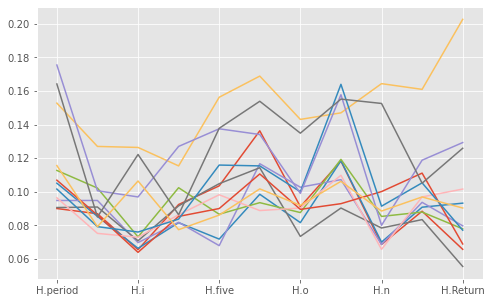

In [56]:
subKeyHoldLatency =dataframe.where((dataframe['subject']==1)).dropna().sample(n=12)
subKeyHoldLatency = subKeyHoldLatency[['subject','H.period','H.t','H.i', 'H.e','H.five','H.Shift.r','H.o','H.a','H.n','H.l','H.Return']]
subKeyHoldLatency = subKeyHoldLatency.set_index('subject')
subKeyHoldLatency.T.plot(figsize=(8,5), legend=False)

In [59]:
data, y = load_data()

# One hot encoding
Y = pd.get_dummies(y).values
n_classes = Y.shape[1]

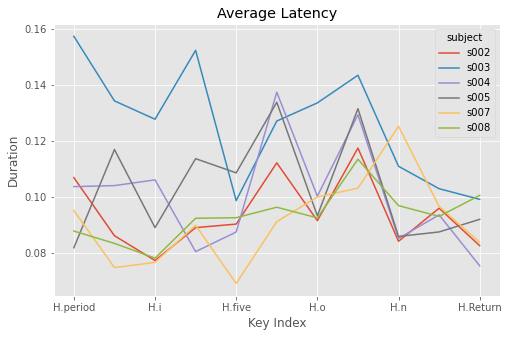

In [60]:
df_plot = data['H'].copy()
df_plot['subject'] = y
df_plot = df_plot.groupby('subject').mean()
df_plot.iloc[:6].T.plot(figsize=(8,5), title='Average Latency')
plt.xlabel('Key Index')
plt.ylabel('Duration');

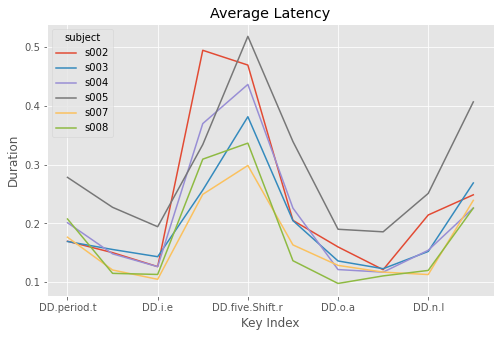

In [61]:
df_plot = data['DD'].copy()
df_plot['subject'] = y
df_plot = df_plot.groupby('subject').mean()
df_plot.iloc[:6].T.plot(figsize=(8,5), title='Average Latency')
plt.xlabel('Key Index')
plt.ylabel('Duration')

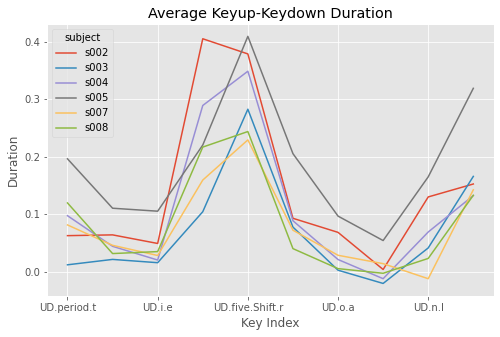

In [62]:
df_plot = data['UD'].copy()
df_plot['subject'] = y
df_plot = df_plot.groupby('subject').mean()
df_plot.iloc[:6].T.plot(figsize=(8,5), title='Average Keyup-Keydown Duration')
plt.xlabel('Key Index')
plt.ylabel('Duration')

In [63]:
from sklearn.manifold import TSNE

# Create the subset of the first 10 classes
classes = np.unique(y)[:10]
mask = [y0 in classes for y0 in y]

X_tsne = data['total'].values[mask]
y_subset = y[mask]

tsne = TSNE(n_components=2, learning_rate=1000, perplexity=8)
X_embedded = tsne.fit_transform(X_tsne)

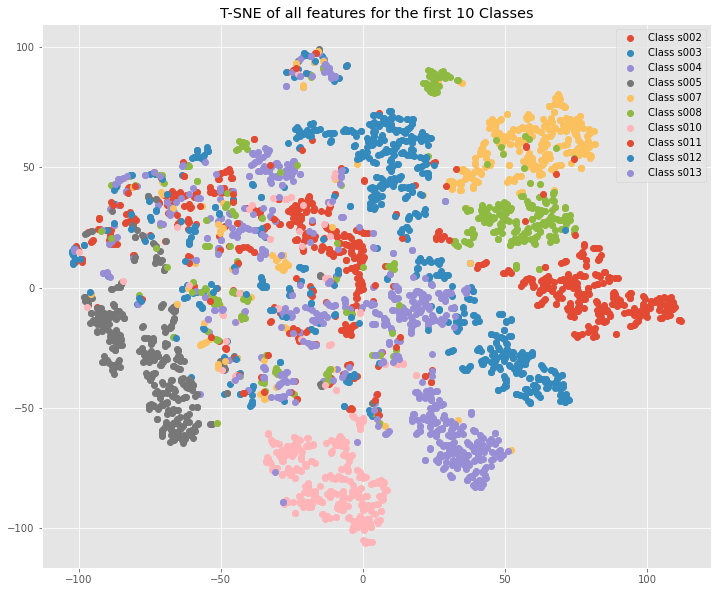

In [64]:
plt.figure(figsize=(12, 10))
for y0 in classes:
    label = 'Class {}'.format(y0)
    plt.plot(X_embedded[y_subset == y0][:, 0],
             X_embedded[y_subset == y0][:, 1],
             'o', label=label)

plt.title('T-SNE of all features for the first 10 Classes')
plt.legend();

In [ ]:
#import pickle

#with open('models\model_RF.sav', 'wb') as file:
#    pickle.dump(random_forest_classifier, file)